In [3]:
from robot import *
from scipy.stats import norm, chi2
%matplotlib inline

In [11]:
def num(epsilon, delta, binnum):
    return math.ceil(chi2.ppf(1.0 - delta, binnum - 1) / (2 * epsilon))

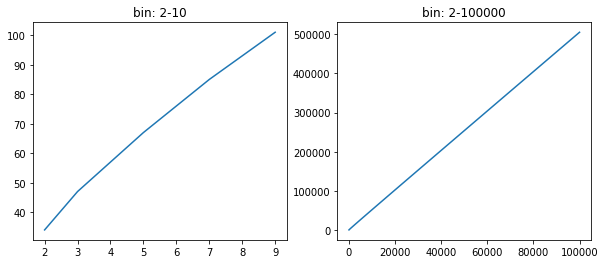

In [12]:
fig, (axl, axr) = plt.subplots(ncols=2, figsize=(10, 4))

bs = np.arange(2, 10)
n = [num(0.1, 0.01, b) for b in bs]
axl.set_title('bin: 2-10')
axl.plot(bs, n)

bs = np.arange(2, 100000)
n = [num(0.1, 0.01, b) for b in bs]
axr.set_title('bin: 2-100000')
axr.plot(bs, n)

In [15]:
def num_wh(epsilon, delta, binnum):
    dof = binnum - 1
    z = norm.ppf(1.0 - delta)
    return math.ceil(dof / (2 * epsilon) * (1.0 - 2.0 / (9 * dof) + math.sqrt(2.0 / (9 * dof)) * z) ** 3)

In [16]:
for binnum in 2, 4, 8, 1000, 10000, 100000:
    print('bin:', binnum, 'eps=0.1, delta=0.01', num(0.1, 0.01, binnum), num_wh(0.1, 0.01, binnum))

bin: 2 eps=0.1, delta=0.01 34 33
bin: 4 eps=0.1, delta=0.01 57 57
bin: 8 eps=0.1, delta=0.01 93 93
bin: 1000 eps=0.1, delta=0.01 5530 5530
bin: 10000 eps=0.1, delta=0.01 51655 51655
bin: 100000 eps=0.1, delta=0.01 505212 505212
